In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results_old = {
    'precision@k': 0.6,
    'recall@k': 1.0,
    'mrr': 1.0
}

results_new = {
    'precision@k': 0.5333333333333333,
    'recall@k': 0.9444444444444444,
    'mrr': 0.7777777777777777
}

In [8]:
import pandas as pd

df_compare = pd.DataFrame({
    "Metric": ["Precision@k", "Recall@k", "MRR"],
    "Old Retriever": [
        results_old["precision@k"],
        results_old["recall@k"],
        results_old["mrr"]
    ],
    "New Retriever": [
        results_new["precision@k"],
        results_new["recall@k"],
        results_new["mrr"]
    ]
})

df_compare

,Metric,Old Retriever,New Retriever
0,Precision@k,0.6,0.533333
1,Recall@k,1.0,0.944444
2,MRR,1.0,0.777778


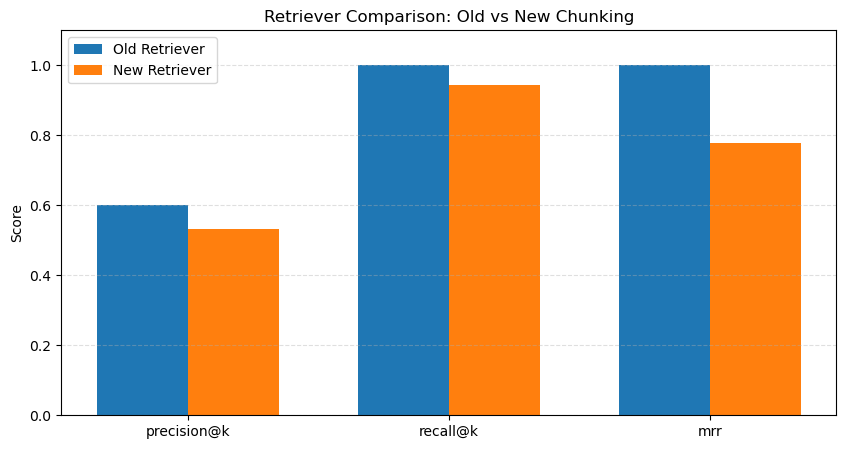

In [9]:
metrics = ["precision@k", "recall@k", "mrr"]
old_scores = [results_old[m] for m in metrics]
new_scores = [results_new[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,5))
plt.bar(x - width/2, old_scores, width, label='Old Retriever')
plt.bar(x + width/2, new_scores, width, label='New Retriever')

plt.ylabel("Score")
plt.title("Retriever Comparison: Old vs New Chunking")
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

- Precision: Measures how many of the retrieved documents in the Top-K are actually relevant. In the old retriever returns fewer irrelevant chunks, meaning it´s more accurate. 
- Recall: Measures whether the retrieved finds all relevant chunks. The old retriver retrives 100% of the correct evidence
- MMR: Measures how high in the ranking the correct answer appears. 

After evaluating both retrievers using Precision@k, Recall@k, and MRR, the results clearly show that the OLD retriever provides higher-quality retrieval performance and is therefore the best option for our RAG system.

- Retrieves more accurate information (higher precision),

- Retrieves all relevant evidence (perfect recall),

- Places the correct chunk at the top of the results (best MRR),

- Produces less noise and more coherent chunks for the LLM.

In [10]:
def interpret_results(old, new):
    print("🔎 Retriever Comparison Analysis\n")

    for metric in ["precision@k", "recall@k", "mrr"]:
        o = old[metric]
        n = new[metric]

        if n > o:
            trend = "⬆️ Improved"
        elif n < o:
            trend = "⬇️ Worse"
        else:
            trend = "➡️ Same"

        print(f"{metric}: Old={o:.3f} | New={n:.3f} → {trend}")

interpret_results(results_old, results_new)

🔎 Retriever Comparison Analysis

precision@k: Old=0.600 | New=0.533 → ⬇️ Worse
recall@k: Old=1.000 | New=0.944 → ⬇️ Worse
mrr: Old=1.000 | New=0.778 → ⬇️ Worse
